In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

import cv2

Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 148.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 148.txt


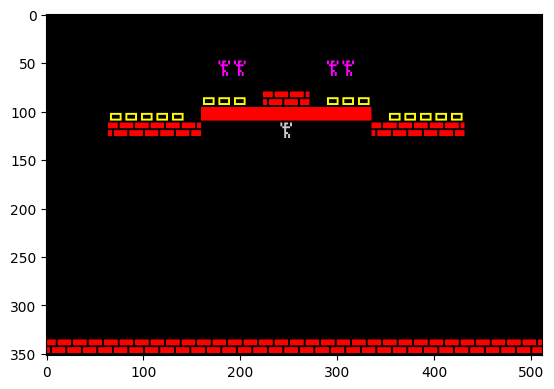

In [27]:
levelNum = 54

lrLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Original_Fixed_Tom/Level*.png"))
print(f"Level Image Being Loaded: {lrLevelPaths[levelNum]}")

lrStringLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Processed/Level*.txt"))
print(f"Level String Being Loaded: {lrStringLevelPaths[levelNum]}")

with open(lrStringLevelPaths[levelNum], "r") as f:
    levelString = np.array([list(line[:-1]) for line in f.readlines()])

levelImage = cv2.cvtColor(cv2.imread(lrLevelPaths[levelNum]), cv2.COLOR_BGR2RGB)
plt.imshow(levelImage)

(58, 2)


Text(0.5, 1.0, '0.0009537689207272937')

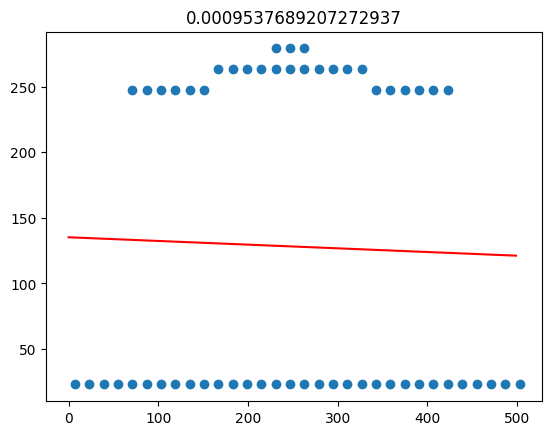

In [47]:
midPointsOfPlatforms = []

for i in range((levelImage.shape[0] // 16) - 1, 0, -1):

    rowImages = []
    rowAffordances = []

    for j in range(0, levelImage.shape[1] // 16):

        y = i * 16
        x = j * 16

        # print(f"y: {y}, x: {x}")

        rowImages.append(levelImage[y:y+16, x:x+16, :])
        rowAffordances.append(levelString[i, j])

        if levelString[i, j].lower() == 'b':
            midPointsOfPlatforms.append([x+7, 352 - y+7])

    # _, axes = plt.subplots(1, 32, figsize=(15, 15))

    # for t, ax in enumerate(axes):
    #     ax.axis(False)
    #     ax.set_title(rowAffordances[t])
    #     ax.imshow(rowImages[t])

midPointsOfPlatforms = np.array(midPointsOfPlatforms)
print(midPointsOfPlatforms.shape)

linRegModel = np.polyfit(midPointsOfPlatforms[:, 0], midPointsOfPlatforms[:, 1], 1)
linRegPredict = np.poly1d(linRegModel)

xPoints = np.arange(0, 500)
rSquare = r2_score(midPointsOfPlatforms[:, 1], linRegPredict(midPointsOfPlatforms[:, 0]))

plt.scatter(midPointsOfPlatforms[:, 0], midPointsOfPlatforms[:, 1])
plt.plot(xPoints, linRegPredict(xPoints), c='r')
plt.title(rSquare)

In [139]:
rSquareScores = []
levelWeights = []

# Way Smith the original creator of Linearity score defines it
for l in range(0, len(lrLevelPaths)):

    lrLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Original_Fixed_Tom/Level*.png"))
    print(f"Level Image Being Loaded: {lrLevelPaths[l]}")

    lrStringLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Processed/Level*.txt"))
    print(f"Level String Being Loaded: {lrStringLevelPaths[l]}")

    with open(lrStringLevelPaths[l], "r") as f:
        levelString = np.array([list(line[:-1]) for line in f.readlines()])

    levelImage = cv2.cvtColor(cv2.imread(lrLevelPaths[l]), cv2.COLOR_BGR2RGB)

    midPointsOfPlatforms = []

    for i in range((levelImage.shape[0] // 16) - 1, 0, -1):

        levelWeight = 0

        rowImages = []
        rowAffordances = []

        for j in range(0, levelImage.shape[1] // 16):

            y = i * 16
            x = j * 16

            # print(f"y: {y}, x: {x}")

            rowImages.append(levelImage[y:y+16, x:x+16, :])
            rowAffordances.append(levelString[i, j])

            # if levelString[i, j] in ['b', 'B', '-', '#']:
            # if levelString[i, j] in ['b', 'B', '-']:
            # if levelString[i, j] in ['b', 'B']:
            # if levelString[i, j] in ['b']:
            # if levelString[i, j] in ['B']:
            
            if levelString[i, j] in ['b', 'B', '-', '#']:
                midPointsOfPlatforms.append([x+8, 352 - y+8])
                # midPointsOfPlatforms.append([x+7, 352 - y+7])

            if levelString[i, j] == 'E':
                levelWeight += -1
            
            if levelString[i, j] == 'G':
                levelWeight += 1

        # _, axes = plt.subplots(1, 32, figsize=(15, 15))

        # for t, ax in enumerate(axes):
        #     ax.axis(False)
        #     ax.set_title(rowAffordances[t])
        #     ax.imshow(rowImages[t])
    
    levelWeights.append(levelWeight)

    midPointsOfPlatforms = np.array(midPointsOfPlatforms)

    if midPointsOfPlatforms.shape[0] == 0:
        rSquareScores.append(0.0)
        continue

    linRegModel = np.polyfit(midPointsOfPlatforms[:, 0], midPointsOfPlatforms[:, 1], 1)
    linRegPredict = np.poly1d(linRegModel)

    xPoints = np.arange(0, 500)
    rSquare = r2_score(midPointsOfPlatforms[:, 1], linRegPredict(midPointsOfPlatforms[:, 0]))
    rSquareScores.append(rSquare)

    # plt.scatter(midPointsOfPlatforms[:, 0], midPointsOfPlatforms[:, 1])
    # plt.plot(xPoints, linRegPredict(xPoints), c='r')
    # plt.title(rSquare)

Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 1.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 1.txt
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 10.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 10.txt
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 100.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 100.txt
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 101.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 101.txt
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 102.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 102.txt
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 103.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 103.txt
Level Image Being Loaded: ../data/vglc/Lode Ru

In [140]:
print(f"Min r^2: {min(rSquareScores)}")
print(f"Max r^2: {max(rSquareScores)}")

Min r^2: -2.220446049250313e-16
Max r^2: 0.07738729005599931


In [12]:
def pointOnLine(a, b, p):
    # From: https://stackoverflow.com/questions/61341712/calculate-projected-point-location-x-y-on-given-line-startx-y-endx-y
    ap = p - a
    ab = b - a
    result = a + np.dot(ap, ab) / np.dot(ab, ab) * ab
    return result

In [57]:
distancesNorm = []
levelWeights = []

# Wau Tile Emebedding Paper Descibes
for l in range(0, len(lrLevelPaths)):

    lrLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Original_Fixed_Tom/Level*.png"))
    print(f"Level Image Being Loaded: {lrLevelPaths[l]}")

    lrStringLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Processed/Level*.txt"))
    print(f"Level String Being Loaded: {lrStringLevelPaths[l]}")

    with open(lrStringLevelPaths[l], "r") as f:
        levelString = np.array([list(line[:-1]) for line in f.readlines()])

    levelImage = cv2.cvtColor(cv2.imread(lrLevelPaths[l]), cv2.COLOR_BGR2RGB)

    midPointsOfPlatforms = []

    for i in range((levelImage.shape[0] // 16) - 1, 0, -1):

        rowImages = []
        rowAffordances = []

        levelWeight = 0

        for j in range(0, levelImage.shape[1] // 16):

            y = i * 16
            x = j * 16

            # print(f"y: {y}, x: {x}")

            rowImages.append(levelImage[y:y+16, x:x+16, :])
            rowAffordances.append(levelString[i, j])

            # if levelString[i, j] in ['b', 'B', '-', '#']:
            # if levelString[i, j] in ['b', 'B', '-']:
            # if levelString[i, j] in ['b', 'B']:
            # if levelString[i, j] in ['b']:
            # if levelString[i, j] in ['B']:
            
            if levelString[i, j] in ['b', 'B', '-', '#']:
                midPointsOfPlatforms.append([x+8, 352 - y+8])
                # midPointsOfPlatforms.append([x+7, 352 - y+7])
            
            if levelString[i, j] == 'E':
                levelWeight += -1
            
            if levelString[i, j] == 'G':
                levelWeight += 1

        # _, axes = plt.subplots(1, 32, figsize=(15, 15))

        # for t, ax in enumerate(axes):
        #     ax.axis(False)
        #     ax.set_title(rowAffordances[t])
        #     ax.imshow(rowImages[t])

    midPointsOfPlatforms = np.array(midPointsOfPlatforms)

    if midPointsOfPlatforms.shape[0] == 0:
        rSquareScores.append(0.0)

    linRegModel = np.polyfit(midPointsOfPlatforms[:, 0], midPointsOfPlatforms[:, 1], 1)
    linRegPredict = np.poly1d(linRegModel)

    p1 = np.array([0, linRegPredict(0)])
    p2 = np.array([500, linRegPredict(500)])

    distances = []

    for point in midPointsOfPlatforms:
        point = np.array(point)
        projectedPoint = pointOnLine(p1, p2, point)
        dist = np.linalg.norm(point-projectedPoint)
        distances.append(dist)

    print(f"Distance Average: {sum(distances)/len(distances)}")
    print(f"Distance Array Length: {len(distances)}")
    print(f"Distance Average Normed: {(sum(distances)/len(distances))/len(distances)}")

    distancesNorm.append((sum(distances)/len(distances))/len(distances))

    levelWeights.append(levelWeight)

Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 1.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 1.txt
Distance Average: 90.3931161565517
Distance Array Length: 196
Distance Average Normed: 0.4611893681456719
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 10.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 10.txt
Distance Average: 81.37303714512639
Distance Array Length: 230
Distance Average Normed: 0.35379581367446256
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 100.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 100.txt
Distance Average: 68.43536056159016
Distance Array Length: 260
Distance Average Normed: 0.2632129252368852
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 101.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 101.txt
Distance Average: 66.99252837107512
Distance 

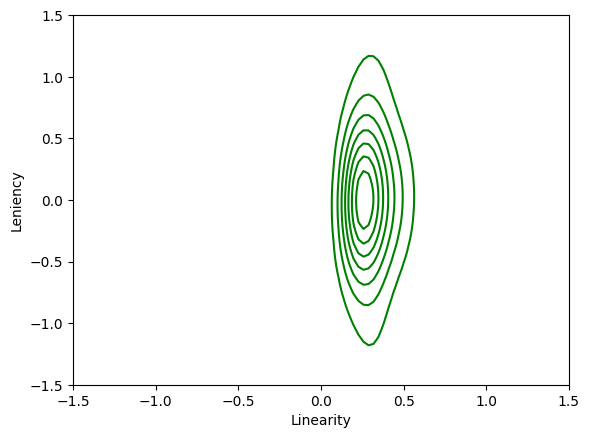

In [86]:
import scipy.stats as st

data = np.concatenate((np.array(distancesNorm).reshape(len(distancesNorm), 1), np.array(levelWeights).reshape(len(levelWeights), 1)), axis=1)
x = data[:, 0]
y = data[:, 1]
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, colors='white')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='green')
# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Linearity')
ax.set_ylabel('Leniency')

plt.show()